# Лабораторная работа 2

In [7]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Линейная регрессия

Напомним про постановку задачи машинного обучения с учителем. 

Пусть 

* $X$ - множество объектов, или же, что более точно множество их информационных описаний
* $Y$ - множество ответов 
* $y: X \rightarrow Y$ - некоторая неизвестная зависимость

Задача ***обучения с учителем выглядит следующим образом*** 

***Дано:*** 

$ {x_1 ... x_l} \subset X $ - обучающая выборка 

$y_1 = y(x_1) ... y_l = y(x_l)$ - ответы

***Требуется найти:*** 

$a: X \rightarrow Y $ - алгоритм, приближающий $y$ на множестве $X$

В случае модели ***линейной регрессии*** имеем: 

* $Y = R$

***Модель регрессии*** - ***линейная модель*** представляется уравнением вида $y = <w,x> + w_0$.

* $x^i$ - объект, имеющий $l$ признаков. 
* $w$ - веса, $w = (w_1, ... w_l)$
* $<w,x> = \sum_{j=1}^{l} w_j x^{i}_j$
* где $w_0$ - сдвиг.

Функция, оценивающая степень ошибки называется ***функцией потерь***. В случае линейной регрессии ***функцией потерь*** будет следующая функция: $$L(w) = \sum_{i=1}^{n} (y_i - (<w,x^i> + w_0))^2$$

На практике часто используется в качестве функции потерь: ***Mean Squared Error, MSE или среднеквадратическое отклонение***:

$$L(w) = \frac{1}{N}\sum_{i=1}^{N} (y_i - (<w,x^i> + w_0))^2$$

***Методом обучения*** как раз и будет метод наименьших квадратов, а именно нахождение таких значений $w$ и $w_0$, которые ***минимизируют сумму квадратов (MSE)*** между фактическими значениями $y_i$ и предсказанными значениями.

$w_0$ часто опускают для упрощения задачи, добавляя ко всем $x_i$ признак тождественно равный единицы. Задача при этом не изменится. Мы далее будем делать также. 

## 1.2 Поиск минимума

Минимум можно найти различными способами:
    
Самый простой - ***аналитический***. Не будем перегружать эту лабораторную работу математическими выкладками. Просто поверьте, что минимум будет равен $w = (X^TX)^{-1}X^Ty$, где $X$ - матрица признаков. 

### Задача 1(1балл)

Реализуйте функцию, принимающую на вход матрицу признаков $X$ и матрицу значений $y$ и вычисляющую точное аналитическое решение для заданных $X$ и $y$.  

In [8]:
def solution(X, y):
    # ВАШ КОД ЗДЕСЬ

IndentationError: expected an indented block (1694884266.py, line 2)

***Однако обращении матрицы — это вычислительно сложно!***. Сложность такого алгоритма $O(n^3)$, где $n$ - размерность матрицы. 

Кроме того, такое численное решение неустойчиво, малое смешение $y$ может привести к критическому смешению $w$. 

Поэтому имеет смысл рассмотреть другие методы поиска минимума - методы, основанные на градиентном спуске. 

## 1.3 Градиентный спуск.

Предположим, у нас есть функция потерь $L(w)$, где $w$ - это вектор параметров, который мы хотим оптимизировать. Наша цель - минимизировать эту функцию потерь путем изменения параметров $w$. Градиентный спуск осуществляет это изменение, используя градиент функции потерь.

Шаги градиентного спуска выглядят следующим образом:

1. Инициализируем параметры $w$ случайными значениями или нулями.
2. Для каждой итерации $t$ обновляем параметры по формуле:
$$w^{(t+1)} = w^{(t)} - \alpha \nabla J(w^{(t)})$$
Где $\alpha$ - это ***коэффициент обучения (learning rate)***, который определяет размер шага, а $\nabla J(w^{(t)})$ - градиент функции потерь по параметрам $w$.

Градиент вычисляется как вектор частных производных функции потерь по каждому элементу $w$, и он показывает направление наискорейшего роста функции потерь.

Формула для вычисления градиента в точке $w$:
$$\nabla J(w) = \left[ \frac{\partial J(w)}{\partial w_1}, \frac{\partial J(w)}{\partial w_2}, ..., \frac{\partial J(w)}{\partial w_l} \right]$$

Где каждая частная производная $\frac{\partial J(w)}{\partial w_i}$ вычисляется отдельно для каждого параметра $w_i$.

После вычисления градиента мы обновляем параметры модели, вычитая градиент, умноженный на коэффициент обучения. Этот процесс повторяется до тех пор, пока изменения параметров остаются незначительными или до тех пор, пока функция потерь не минимизируется в нужной степени.

Таким образом, градиентный спуск представляет собой мощный метод оптимизации, который позволяет находить оптимальные параметры модели путем минимизации функции потерь.

Запишем функцию потерь в матричном виде: $L(w,X,y) = \frac{1}{N}||Xw - y||^2$. 

Тогда $\nabla J(w) = \frac{2}{N}X^T(Xw-y)$. 

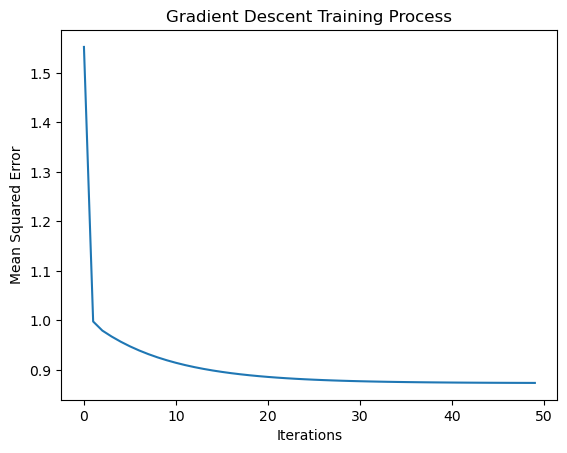

In [9]:
# реализуем градиентный спуск для MSE

def gradient_descent(X, y, w, learning_rate, number_iterations):
    # список ошибки на каждой итерации 
    loss_iterations = []
    N = len(y)
    for i in range(number_iterations):
        # вычисляем градиент
        gradient = 2/N * X.T.dot(X.dot(w) - y)
        # корректируем параметры
        w = w - learning_rate * gradient
        
        # вычисляем функцию потерь
        cost = np.mean((X.dot(w) - y) ** 2)
        loss_iterations.append(cost)

    return w, loss_iterations

# пример использования
# сгенерируем синтетические данные
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# добавляем столбец с единицами для коэффициента сдвига (intercept)
X_w0 = np.c_[np.ones((100, 1)), X]

# устанавливаем параметры
w = np.random.randn(2, 1)
learning_rate = 0.2
number_iterations = 50

# обучаем модель с использованием градиентного спуска
w, loss_iterations = gradient_descent(X_w0, y, w, learning_rate, number_iterations)

# визуализируем процесс обучения
import matplotlib.pyplot as plt
plt.plot(loss_iterations)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Training Process')
plt.show()

### Задача 2(2 балла)
Датасет "Boston House Prices" известен как один из классических наборов данных для задач машинного обучения. Он включает информацию о различных аспектах жилых домов в пригородах Бостона. В этом наборе данных содержится 506 наблюдений и 13 признаков, используемых для прогнозирования медианной стоимости домов в тысячах долларов.

1. Разделите выборку на обучающую и тестовую, в отношении 4:1. 
2. Нормализуйте данные. 
3. С помощью градиентного спуска обучите линейную модель и постройте три графика MSE от числа итераций для learning_rate = 0.05, learning_rate = 0.1, learning_rate = 0.2. 

In [4]:
from sklearn.datasets import fetch_california_housing
# Загрузка набора данных
housing = fetch_california_housing()
# Load the Boston House Prices dataset
X = housing.data
y = housing.target
# ВАШ КОД ЗДЕСЬ

## 1.4 Стохастический градиентный спуск

На каждом шаге градиентного спуска мы вычисляем градиент по всей выборке. Эта операция имеет сложность $O(Nl)$, где l - числа признаков, а N - число объектов. Возникает идея стохастического градиентного спуска. 

***Стохастический градиентный спуск (SGD)*** - это метод оптимизации, используемый для обучения моделей машинного обучения, таких как линейная регрессия или нейронные сети. Основная идея состоит в том, чтобы на каждом шаге обновлять параметры модели, используя градиент функции потерь на основе только одного случайно выбранного примера(или примеров) из обучающего набора. Это позволяет избежать вычислительной сложности, связанной с обработкой всего набора данных, и может привести к более быстрой сходимости.

Математический процесс стохастического градиентного спуска заключается в следующих шагах:

1. Выбирается случайный пример(или примеры) из обучающего набора с меткой ($x^{(i)}, y^{(i)})$.
2. Вычисляется градиент функции потерь по параметрам модели для этого примера: $\nabla J^{(i)}(w)$.
3. Обновляются параметры модели $w$ в направлении, противоположном градиенту, с использованием скорости обучения $\alpha$: $w := w - \alpha \nabla J^{(i)}(w)$.

Этот процесс повторяется для всех примеров в обучающем наборе или до достижения критерия останова, такого как сходимость на валидационном наборе данных или заданное количество эпох (полных проходов через обучающий набор).

Хотя стохастический градиентный спуск обычно обучает модели быстрее, чем обычный градиентный спуск, его использование подвержено случайности выбора примеров, что может привести к менее стабильной сходимости к оптимальному решению.

***batch(батч)*** - подвыборка, по которой считается градиент в стохастическом градиентном спуске. 

***Эпоха*** - это один полный проход по выборке. 

### Задача 3(3 балла)

1. Реализуйте алгортим стохастического градиентного спуска. 
2. С помощью стохастического градиентного спуска обучите линейную модель и постройте три графика MSE от числа итераций для learning_rate = 0.05, learning_rate = 0.1, learning_rate = 0.2. Размер batch возьмите равным $\frac{N}{10}$. Число эпох возьмите равным 3.  

In [15]:
#ВАШ КОД ЗДЕСЬ

## 2 Линейный классификатор 

Линейный классификатор - это модель машинного обучения, используемая для разделения двух классов данных, обычно в предположении, что классы линейно разделимы. Математически, линейный классификатор представляет собой гиперплоскость, которая разделяет объекты одного класса от объектов другого класса в пространстве функций признаков.

Предположим, что у нас есть набор обучающих данных, каждый из которых представлен вектором признаков x и меткой класса y. Линейный классификатор моделирует прогноз для метки класса y как взвешенную комбинацию входных признаков с добавленным смещением (bias), и затем применяет функцию активации для преобразования этой комбинации в прогноз класса.

Предположим, что у нас есть D-мерное пространство признаков, и мы хотим разделить два класса (+1 и -1). Линейный классификатор моделирует прогноз как:

$y = sign(w^T x + b)$

Линейный классификатор можно обучать с использованием различных методов, включая градиентный спуск, стохастический градиентный спуск, метод опорных векторов (SVM) и другие. Главная цель обучения линейного классификатора состоит в том, чтобы найти оптимальные веса $w$ и смещение $b$, которые минимизируют функцию потерь и обеспечивают хорошую обобщающую способность модели.

## 3. L1 и L2 регурялизация

***L1 и L2 регуляризация*** - это методы добавления штрафа за сложность модели во время обучения, который помогает предотвратить переобучение. Регуляризация добавляет дополнительный член в функцию потерь модели, который зависит от весов (параметров) модели, тем самым штрафуя большие веса и предотвращая их излишнюю сложность.

1. ***L1 Регуляризация***:
Также известная как Lasso регуляризация. В L1 регуляризации дополнительный член в функции потерь представляет собой сумму абсолютных значений весов модели:
$L1: \lambda \sum_{i=1}^{n} |w_i|$
где $( \lambda $) - коэффициент регуляризации, который контролирует величину штрафа, а $( w_i $) - веса модели.

Преимуществом L1 регуляризации является ее способность к отбору признаков - некоторые веса могут быть точно нулевыми, что делает ее полезной при работе с большим количеством признаков, отбирая наиболее важные из них.

2. ***L2 Регуляризация***:
Также известная как Ridge регуляризация. В L2 регуляризации дополнительный член в функции потерь представляет собой сумму квадратов весов модели:
$L2: \lambda \sum_{i=1}^{n} w_i^2$
где $( \lambda $) - коэффициент регуляризации, а $( w_i $) - веса модели.

L2 регуляризация штрафует большие веса, но не склонна делать их точно нулевыми. Это делает ее полезной при предотвращении переобучения и улучшении обобщающей способности модели.

Оба метода регуляризации (L1 и L2) могут быть использованы отдельно или совместно для улучшения стабильности и обобщающей способности моделей машинного обучения.

Рассмотрим пример регрессии-Lasso в sklearn. 

### Задача 4(3 балла)

1. Реализуйте и обучите модель Lasso и Ridge 
2. Найдите при каком значении alpha достигается лучший результат.

In [20]:
from sklearn.linear_model import Lasso
# Загрузка набора данных
housing = fetch_california_housing()
# Load the Boston House Prices dataset
X = housing.data
y = housing.target

# Масштабирование признаков
# ВАШ КОД ЗДЕСЬ

# Разделение данных на обучающий и тестовый наборы
# ВАШ КОД ЗДЕСЬ

# Создание и обучение модели Lasso
lasso = Lasso(alpha=0.1)  # Устанавливаем коэффициент регуляризации (alpha)
# ВАШ КОД ЗДЕСЬ

# Оценка модели
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)

print("Train score:", train_score)
print("Test score:", test_score)

Train score: 0.7450020631904374
Test score: 0.6497587169007897


В качестве метрики здесь выступает коэффециент детерминации. Подробнее можно почитать тут https://ru.wikipedia.org/wiki/Коэффициент_детерминации

In [ ]:
from sklearn.linear_model import Ridge

# Загрузка набора данных
housing = fetch_california_housing()
# Load the Boston House Prices dataset
X = housing.data
y = housing.target

# Масштабирование признаков
# ВАШ КОД ЗДЕСЬ

# Разделение данных на обучающий и тестовый наборы
# ВАШ КОД ЗДЕСЬ

# Создание и обучение модели Ridge
ridge = Ridge(alpha=0.1)  # Устанавливаем коэффициент регуляризации (alpha)
# ВАШ КОД ЗДЕСЬ

# Оценка модели
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)

print("Train score:", train_score)
print("Test score:", test_score)

### Задача 5(1 балл)

$$L(w) = \frac{1}{N}\sum_{i=1}^{N} (y_i - (<w,x^i> + w_0))^2$$

Докажите, что аналитическое решение минимума данной функции будет равно: $w = (X^TX)^{-1}X^Ty$